# Lista 09 - Aprendizado de Máquina

## Aluno: Ruan Felipe de Almeida Silva - 397048

In [22]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import naive_bayes

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

### Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database". 


#### Importação dos dados

In [23]:
dataframe = pd.read_csv('diabetes.csv', delimiter=',')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Verificando os tipos de dados do dataset

In [24]:
dataframe.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Verificando se existem valores faltantes no conjunto de dados

In [25]:
dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Dividindo o dataset nas features e no target e verificando os valores de target desse dataset

In [26]:
X = dataframe.drop('Outcome', axis=1)
y = dataframe['Outcome']
np.unique(y)

array([0, 1])

#### Exibindo a quantidade de amostras existente em cada classe.

In [27]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 1. Separe os dados em treino (80%) e teste (20%).

In [28]:
X_values = X.values
y_values = y.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_values, y_values, test_size=0.2, random_state=742, stratify=y_values)
print("Conjunto x de treino:", X_train.shape[0])
print("Conjunto x de teste:", X_test.shape[0])
print("Conjunto y de treino:", y_train.shape[0])
print("Conjunto y de teste:", y_test.shape[0])

Conjunto x de treino: 614
Conjunto x de teste: 154
Conjunto y de treino: 614
Conjunto y de teste: 154


#### Apresentando o histograma das features do dataset

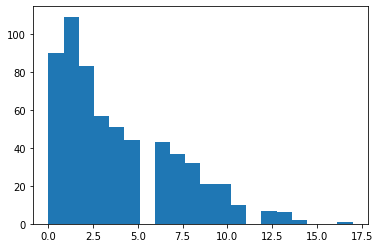

In [29]:
idx = 0
plt.hist(X_train[:, idx], bins=20);

### 2. Crie e avalie modelos usando kNN, Logistic Regression, SVM e Naive Bayes. Aplique um Grid Search com Validação Cruzada (CV) com k=5 no k-Fold sobre o conjunto de treino. A métrica de avaliação usada deve ser a métrica F1-Score. Teste diferentes hiperparâmetros. Escolha o melhor algoritmo e hiperparâmetros baseado no Grid Search.

#### Criando os modelos

In [30]:
knn = KNeighborsClassifier()
log = LogisticRegression(random_state=742)
svc = svm.SVC(random_state=742)
nb = naive_bayes.GaussianNB()

#### Agrupando os modelos em uma lista

In [31]:
ensemble_classifier = [knn, log, svc, nb]

#### Criando os dicionários com os parâmetros para cada classificador

In [32]:
params_knn={"n_neighbors": range(1, 25), 
         "weights": ['uniform', 'distance'],
         "metric":['manhattan', 'minkowski', 'euclidean']}

params_log={"penalty":['none', 'l2'],
         "C": np.logspace(-5, 5, 11), 
         "solver": ['newtong-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
         "max_iter": [10, 50, 100, 200]}

params_svc={"C": np.logspace(-4, 4, 9),
            "kernel": ['rbf', 'sigmoid'],
            "gamma": ['scale', 'auto'],
            "max_iter":[-1, 10, 50, 100]}
         
params_nb={"var_smoothing":np. logspace(-9, 0, 10)}



#### Agrupando os parâmetros definidos em uma lista

In [33]:
params_list = [params_knn, params_log, params_svc, params_nb]

#### Utilizando o gridSearch para cada modelo, empregando os parâmetros definidos. Os resultados são armazenados em uma lista de resultados.

In [34]:
results = []
models = ['KNN', 'LR', 'SVC', 'NB']

for classifier, params, model in zip(ensemble_classifier, params_list, models):
    
    gridSearch = model_selection.GridSearchCV(estimator=classifier, param_grid=params, return_train_score=False, scoring='f1_weighted', cv=5)
    gs = gridSearch.fit(X=X_train, y=y_train)

    print(f'Modelo: {gs.best_estimator_}')
    print(f'Melhor F1-Score: {gs.best_score_}')        
    print(f'Melhores parâmetros: {gs.best_params_}')
    print("\n---------------------------------------------------------------------------------\n")

    resultado = {'Model':model, 
                'Params':gs.best_params_, 
                'F1-Score':gs.best_score_,
                'Estimator':gs.best_estimator_}
    
    results.append(resultado)





Modelo: KNeighborsClassifier(metric='manhattan', n_neighbors=24, weights='distance')
Melhor F1-Score: 0.7392726459941139
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'distance'}

---------------------------------------------------------------------------------

Modelo: LogisticRegression(C=0.1, random_state=742)
Melhor F1-Score: 0.7634171261503115
Melhores parâmetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

---------------------------------------------------------------------------------

Modelo: SVC(C=10.0, random_state=742)
Melhor F1-Score: 0.7339023920922834
Melhores parâmetros: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1}

---------------------------------------------------------------------------------

Modelo: GaussianNB(var_smoothing=1e-06)
Melhor F1-Score: 0.7436753334944008
Melhores parâmetros: {'var_smoothing': 1e-06}

---------------------------------------------------------------------------------



#### Criando um dataframe com os resultados

In [35]:
df_results = pd.DataFrame(results)
df_results

,Model,Params,F1-Score,Estimator
0,KNN,"{'metric': 'manhattan', 'n_neighbors': 24, 'we...",0.739273,"KNeighborsClassifier(metric='manhattan', n_nei..."
1,LR,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...",0.763417,"LogisticRegression(C=0.1, random_state=742)"
2,SVC,"{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf',...",0.733902,"SVC(C=10.0, random_state=742)"
3,NB,{'var_smoothing': 1e-06},0.743675,GaussianNB(var_smoothing=1e-06)


#### Ordenando os resultados pela métrica F1-Score

In [36]:
df_sorted = df_results.sort_values(by='F1-Score', ascending=False)
df_sorted

,Model,Params,F1-Score,Estimator
1,LR,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...",0.763417,"LogisticRegression(C=0.1, random_state=742)"
3,NB,{'var_smoothing': 1e-06},0.743675,GaussianNB(var_smoothing=1e-06)
0,KNN,"{'metric': 'manhattan', 'n_neighbors': 24, 'we...",0.739273,"KNeighborsClassifier(metric='manhattan', n_nei..."
2,SVC,"{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf',...",0.733902,"SVC(C=10.0, random_state=742)"


#### Imprimindo os melhores parâmetros encontrados para o melhor modelo

In [37]:
best_model = df_sorted.iloc[0, :]
best_model['Params']

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

### 3. Treine um novo modelo usando o melhor resultado do Grid Search sobre todos os dados de treino (80% do dataset).

In [38]:
model = best_model['Estimator']
model.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=742)

### 4. Avalie o modelo usando a métrica F1-Score sobre os dados de teste.


In [39]:
y_pred = model.predict(X_test)
f1score = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
print(f'Modelo: {model}')
print(f'F1-Score: {f1score}')

Modelo: LogisticRegression(C=0.1, random_state=742)
F1-Score: 0.7878921078921078


### 5. Desenhe as regiões de decisão em 2D. As regiões devem se basear nos dados de treino (80% do dataset). O gráfico deve mostrar os dados de teste (20% do dataset). Dica: transforme as features em 2D usando a técnica PCA (Principal Component Analysis), conforme mostramos em aula e no Jupyter Notebook que disponibilizamos.

In [40]:
X_values = X.values
y_values = y.values
pca = PCA(n_components=2)
novoX = pca.fit_transform(X_values)

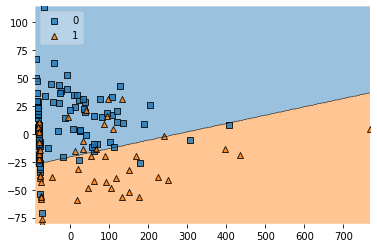

In [41]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(novoX, y_values, test_size=0.2, stratify=y_values, random_state=742)
modelo = LogisticRegression(C=0.1, random_state=742, max_iter=100, penalty='l2')
modelo.fit(X_train, y_train)
plt.figure(figsize = (14, 5))
plot_decision_regions(X_test, y_test, clf=modelo, legend=2)
plt.show()